## Fancy Indexing

In [3]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
# Accessing three elements
[x[3], x[7], x[2]]

[np.int32(71), np.int32(86), np.int32(14)]

In [5]:
ind = np.array([[3, 7],
                [4, 5]])

x[ind]

array([[71, 86],
       [60, 20]], dtype=int32)

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [8]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [9]:
row.shape

(3,)

In [10]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [11]:
Y = np.arange(16).reshape((4, 4))
Y

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [12]:
row = np.array([2, 3, 1])
col = np.array([2, 3, 1])
Y[row, col]

array([10, 15,  5])

## Combined Indexing

In [13]:
# We combine fancy indexing with simple indices:
print(X)
X[2, [2, 0, 1]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([10,  8,  9])

In [14]:
# Combing fancy indexing with slicing:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [18]:
# Combing fancy indexing with masking: 
mask = np.array([1, 0, 1], dtype=bool)
 # X[row[:, np.newaxis], mask]

### **Example: Selecting random points:**

In [20]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

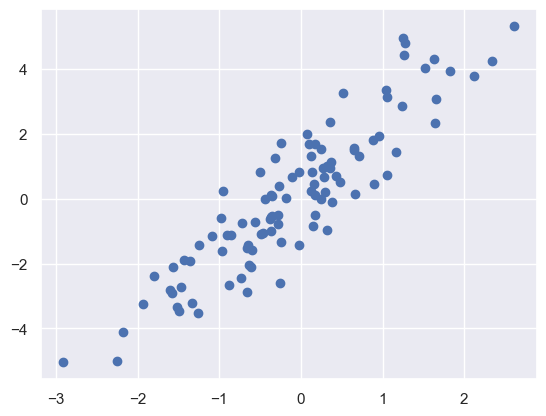

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

plt.scatter(X[:, 0], X[:,1]);

In [23]:
# Selecting 20 random points without repetation, and using these indicies to select a portion of the original array:

indices = np.random.choice(X.shape[0], 20, replace=False)
indices
selection = X[indices]    # usuage of fancy indexing
selection.shape

(20, 2)

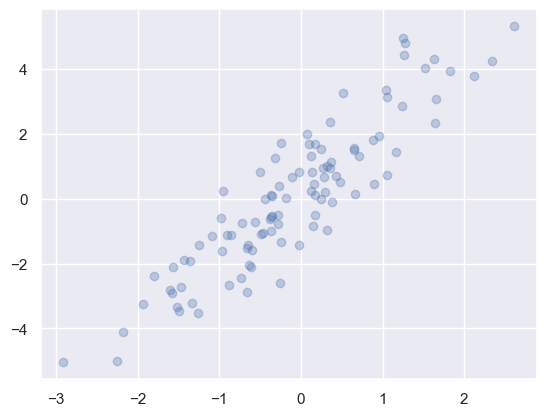

In [24]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor="none", s=200);

## Modifying Values with Fancy Indexing

In [26]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)
x[i] -=10
print(x)

[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


In [32]:
x = np.zeros(10)
x[[0,0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


### **Example: Binning Data**

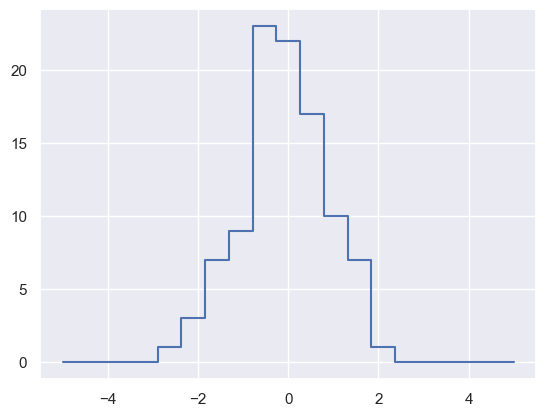

In [58]:
np.random.seed(42)
x = np.random.randn(100)

# computing a histogram
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of those bins
np.add.at(counts, i, 1)

# plot the results
plt.step(bins, counts);

In [37]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
82.2 ms ± 6.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
165 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
